In [1]:
from dataset.Norm2dDataset import Norm2dDataset, Norm2dParameter
from sklearn.linear_model import LogisticRegression
from evaluator.visualize import joinplot
import seaborn as sns
import matplotlib.pyplot as plt

# create dataset

In [2]:
params_dict1 =  {"myu":[10,10], "sigma": [[1,0],[0,1]], "samples": 1000}
params_dict2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}

param1 = Norm2dParameter(**params_dict1)
param2 = Norm2dParameter(**params_dict2)
dataset = Norm2dDataset((param1, param2))
# sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y', ax = axes[0])

# modeling

## 必須関数

In [3]:
def predict(df):
    lr = LogisticRegression(penalty='l2')
    lr.fit(df.X, df.Y)    
    df["rprob"] = lr.predict_proba(df.X)[:,0].round(1)
        
    sns.jointplot(data = df.data,x = "x1", y = "x2", hue= "rprob")
    return df
            

## 完全分離

/home/work/.cache/pypoetry/virtualenvs/godaddy-3UyvmeC2-py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


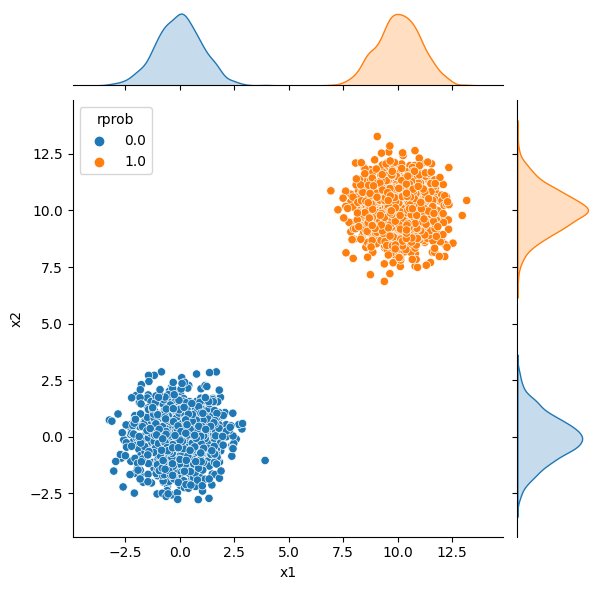

In [4]:
a = predict(dataset);

In [24]:
joinplot(dataset)

In [25]:
print(a.split('/'))

['asfasdf.png']


/tmp/ipykernel_112731/3528021310.py:3: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  out = sns.jointplot(data=dataset.data, x="x1", y="x2", color="red", hue="y", ax=ax)


<Figure size 640x480 with 0 Axes>

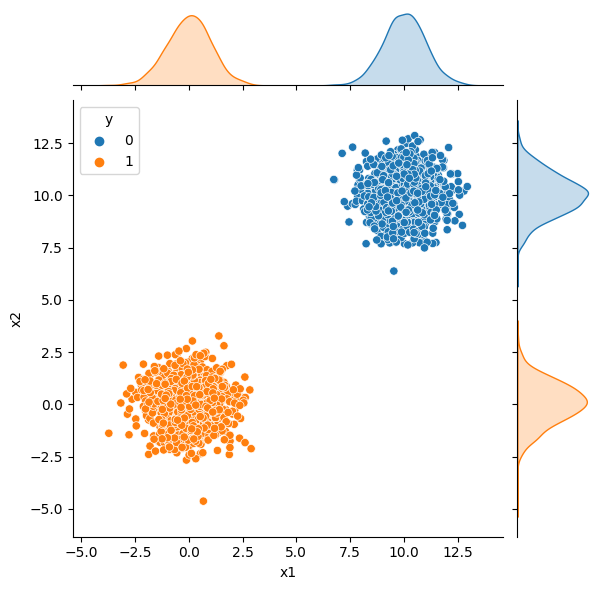

In [20]:
hues = ["y", "rprob"]
fig = plt.figure()
out = sns.jointplot(data=dataset.data, x="x1", y="x2", color="red", hue="y", ax=ax)

In [22]:
out.savefig("./asdf/sample.png")

FileNotFoundError: [Errno 2] No such file or directory: './asdf/sample.png'

In [7]:
out =plt.subplots(1, len(hues), figsize=(4, 5 * len(hues)))

x1,x2,y,rprob
f64,f64,str,f64
10.774406,9.22979,"""0""",1.0
9.662876,10.282932,"""0""",1.0
9.516142,9.160462,"""0""",1.0
11.739728,11.312253,"""0""",1.0
10.846735,10.83637,"""0""",1.0
10.475829,10.736555,"""0""",1.0
10.105224,11.477031,"""0""",1.0
10.110729,9.567246,"""0""",1.0
9.279627,10.29965,"""0""",1.0


/home/work/src/evaluator/visualize.py:51: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=dataset.data, x=x1, y=x2, color="red", hue=hue, ax=ax)


ValueError: The following variable cannot be assigned with wide-form data: `hue`

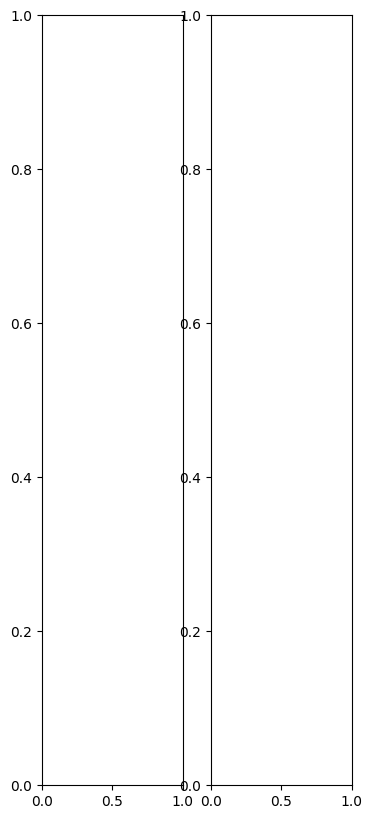

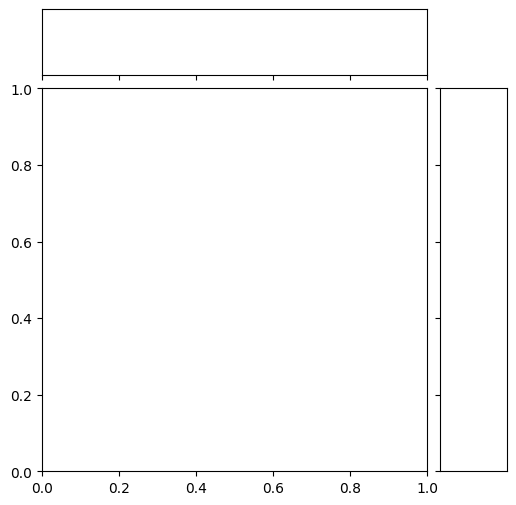

In [5]:
joinplot_with_multiple_hues(dataset, ["rprob", "y"])

## 一部重なり

In [ ]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 50}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples":1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

## random forest

In [ ]:
def predict_random_forest(df, x1, x2, y):
    rf = RandomForestClassifier()
    rf.fit(df[[x1,x2]], df[y])    
    df["prob"] = rf.predict_proba(df[[x1, x2]])[:,0]    
    df["rprob"] = df["prob"].round(1)
        
    sns.jointplot(data = df,x = x1, y = x2, hue= "rprob")
    return df

In [ ]:
params1 =  {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples":1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[2,2], "sigma": [[1,0],[0,1]], "samples": 1000}
params2 = {"myu":[0,0], "sigma": [[1,0],[0,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[2,2], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
params1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "samples":2000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "samples": 1000}
param1 = Norm2dParameter(**params1)
param2 = Norm2dParameter(**params2)
dataset = Norm2dDataset((param1, param2))
sns.jointplot(data = dataset.data, x = dataset.X_COLUMNS[0], y = dataset.X_COLUMNS[1], color = "red", hue= 'y')
predict(dataset);

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 1)        
        self.F = F.relu
        self.sigmoid = F.sigmoid

    def forward(self, x):
        x = self.F(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)
    
def fit(model, x, y):
    criterion = nn.BCELoss().cuda()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

    for i in tqdm(range(3000)):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
def predict(model, x):
    with torch.no_grad():
        pred = model(x)
    return pred

def predict_MLP(df, x1,x2, y):
    model = MLP(2).cuda()
    
    X = torch.from_numpy(df[[x1, x2]].values).cuda().float()
    y = torch.from_numpy(df[["y"]].astype(float).values).cuda().float()
    
    fit(model, X, y)
    
    df["prob"] = predict(model, X).cpu()
    df["rprob"] = df["prob"].round(1)
    sns.jointplot(data = df,x = "x1", y = "x2", hue= "rprob")
    return df

In [ ]:
params1 =  {"myu":[1,1], "sigma": [[0.1,-0.08],[-0.08,0.1]], "size":1000}
params2 = {"myu":[-1,-1], "sigma": [[0.1,0.06],[0.06,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

In [ ]:
kyo1 = 0
kyo2 = 0
params1 =  {"myu":[0,0], "sigma": [[0.1,kyo1],[kyo1,0.1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[0.1,kyo2],[kyo2,0.1]], "size": 1000}
df = create_df(params1, params2);
df = predict_MLP(df, "x1", "x2", "y")

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

In [ ]:
params1 =  {"myu":[1,1], "sigma": [[1,-0.8],[-0.8,1]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.6],[0.6,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())

In [ ]:
params1 =  {"myu":[0.05,0.05], "sigma": [[10,0.5],[0.5,10]], "size":1000}
params2 = {"myu":[0,0], "sigma": [[1,0.5],[0.5,1]], "size": 1000}
df = create_df(params1, params2);
df = predict_random_forest(df, "x1", "x2", "y");

df[df["prob"] < 1E-6] = 1E-6
df[df["prob"] > 1 - 1E-6] = 1 - 1E-6
print((df["prob"]/(1-df["prob"])).mean())